In [19]:
patients <- read.table("project_data.txt", header = FALSE, sep = "", dec = ".")
colnames(patients) <- c("id", "psa_level", "cancer_volume", "weight", "age", "benign_prostatic_hyperplasia", "seminal_vesicle_invasion", "capsular_penetration", "gleason_score")
head(patients)

id,psa_level,cancer_volume,weight,age,benign_prostatic_hyperplasia,seminal_vesicle_invasion,capsular_penetration,gleason_score
1,0.651,0.5599,15.959,50,0,0,0,6
2,0.852,0.3716,27.660,58,0,0,0,7
3,0.852,0.6005,14.732,74,0,0,0,7
4,0.852,0.3012,26.576,58,0,0,0,6
5,1.448,2.1170,30.877,62,0,0,0,6
6,2.160,0.3499,25.280,50,0,0,0,6


In [20]:
summary(patients)
round(cor(patients[c("psa_level","cancer_volume","weight","age","benign_prostatic_hyperplasia","seminal_vesicle_invasion","capsular_penetration","gleason_score")]),3) 

       id       psa_level       cancer_volume         weight      
 Min.   : 1   Min.   :  0.651   Min.   : 0.2592   Min.   : 10.70  
 1st Qu.:25   1st Qu.:  5.641   1st Qu.: 1.6653   1st Qu.: 29.37  
 Median :49   Median : 13.330   Median : 4.2631   Median : 37.34  
 Mean   :49   Mean   : 23.730   Mean   : 6.9987   Mean   : 45.49  
 3rd Qu.:73   3rd Qu.: 21.328   3rd Qu.: 8.4149   3rd Qu.: 48.42  
 Max.   :97   Max.   :265.072   Max.   :45.6042   Max.   :450.34  
      age        benign_prostatic_hyperplasia seminal_vesicle_invasion
 Min.   :41.00   Min.   : 0.000               Min.   :0.0000          
 1st Qu.:60.00   1st Qu.: 0.000               1st Qu.:0.0000          
 Median :65.00   Median : 1.350               Median :0.0000          
 Mean   :63.87   Mean   : 2.535               Mean   :0.2165          
 3rd Qu.:68.00   3rd Qu.: 4.759               3rd Qu.:0.0000          
 Max.   :79.00   Max.   :10.278               Max.   :1.0000          
 capsular_penetration gleason_scor

,psa_level,cancer_volume,weight,age,benign_prostatic_hyperplasia,seminal_vesicle_invasion,capsular_penetration,gleason_score
psa_level,1.000,0.624,0.026,0.017,-0.016,0.529,0.551,0.430
cancer_volume,0.624,1.000,0.005,0.039,-0.133,0.582,0.693,0.481
weight,0.026,0.005,1.000,0.164,0.322,-0.002,0.002,-0.024
age,0.017,0.039,0.164,1.000,0.366,0.118,0.100,0.226
benign_prostatic_hyperplasia,-0.016,-0.133,0.322,0.366,1.000,-0.120,-0.083,0.027
seminal_vesicle_invasion,0.529,0.582,-0.002,0.118,-0.120,1.000,0.680,0.429
capsular_penetration,0.551,0.693,0.002,0.100,-0.083,0.680,1.000,0.462
gleason_score,0.430,0.481,-0.024,0.226,0.027,0.429,0.462,1.000


In [21]:
patients.model <- lm(psa_level ~ cancer_volume + weight + age + benign_prostatic_hyperplasia + seminal_vesicle_invasion + capsular_penetration + gleason_score, data=patients)

In [22]:
AIC(patients.model)
anova(patients.model)
summary(patients.model)

[1] 952.1656

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
cancer_volume,1,62202.34271,62202.34271,64.03165841,4.304312e-12
weight,1,84.65815,84.65815,0.08714787,7.685224e-01
age,1,19.81633,19.81633,0.02039911,8.867509e-01
benign_prostatic_hyperplasia,1,814.66003,814.66003,0.83861846,3.622668e-01
seminal_vesicle_invasion,1,7365.95645,7365.95645,7.58258269,7.144264e-03
capsular_penetration,1,932.86108,932.86108,0.96029569,3.297687e-01
gleason_score,1,1794.04851,1794.04851,1.84680989,1.775888e-01
Residuals,89,86457.36561,971.43107,NA,NA



Call:
lm(formula = psa_level ~ cancer_volume + weight + age + benign_prostatic_hyperplasia + 
    seminal_vesicle_invasion + capsular_penetration + gleason_score, 
    data = patients)

Residuals:
    Min      1Q  Median      3Q     Max 
-61.330  -8.130  -0.014   6.324 167.436 

Coefficients:
                              Estimate Std. Error t value Pr(>|t|)    
(Intercept)                  -15.24264   40.53932  -0.376 0.707814    
cancer_volume                  2.03225    0.59359   3.424 0.000936 ***
weight                         0.01132    0.07395   0.153 0.878708    
age                           -0.53721    0.47588  -1.129 0.261977    
benign_prostatic_hyperplasia   1.29831    1.20168   1.080 0.282878    
seminal_vesicle_invasion      19.60957   10.89184   1.800 0.075187 .  
capsular_penetration           1.09877    1.33377   0.824 0.412253    
gleason_score                  7.05922    5.19452   1.359 0.177589    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [23]:
patients.model.r1 <- update(patients.model, . ~ . - weight -capsular_penetration)
summary(patients.model.r1)
anova(patients.model.r1)
AIC(patients.model.r1)


Call:
lm(formula = psa_level ~ cancer_volume + age + benign_prostatic_hyperplasia + 
    seminal_vesicle_invasion + gleason_score, data = patients)

Residuals:
    Min      1Q  Median      3Q     Max 
-54.839  -8.758   0.206   5.181 163.883 

Coefficients:
                             Estimate Std. Error t value Pr(>|t|)    
(Intercept)                  -18.4353    39.8719  -0.462   0.6449    
cancer_volume                  2.2595     0.5238   4.313 4.07e-05 ***
age                           -0.5261     0.4715  -1.116   0.2674    
benign_prostatic_hyperplasia   1.3714     1.1412   1.202   0.2326    
seminal_vesicle_invasion      23.6477     9.6720   2.445   0.0164 *  
gleason_score                  7.4688     5.1080   1.462   0.1471    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 30.94 on 91 degrees of freedom
Multiple R-squared:  0.4543,	Adjusted R-squared:  0.4243 
F-statistic: 15.15 on 5 and 91 DF,  p-value: 8.245e-11


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
cancer_volume,1,62202.342713,62202.342713,64.959385596,2.880403e-12
age,1,8.293344,8.293344,0.008660936,9.260572e-01
benign_prostatic_hyperplasia,1,909.506681,909.506681,0.949819454,3.323489e-01
seminal_vesicle_invasion,1,7366.623010,7366.623010,7.693139580,6.724960e-03
gleason_score,1,2047.216451,2047.216451,2.137956821,1.471381e-01
Residuals,91,87137.726672,957.557436,NA,NA


[1] 948.9259

In [37]:
patients.model.r2 <- lm(psa_level ~ cancer_volume + cancer_volume:seminal_vesicle_invasion + seminal_vesicle_invasion , data=patients)
patients.model.r3 <- lm(psa_level ~ cancer_volume + seminal_vesicle_invasion , data=patients)

In [39]:
# Fit biomass for pH=4.15 AND Na=10000. and create a P.I.
newdata=data.frame(cancer_volume=4.2633,seminal_vesicle_invasion = 0)

In [40]:
#apply(linthurst[,c("pH","Na")], 1, function(x, want) isTRUE(all.equal(as.numeric(x), want)), newdata)
predict(patients.model.r3, newdata, interval="prediction",level=0.90)

,fit,lwr,upr
1,11.61938,-40.36683,63.6056


In [41]:
predict(patients.model.r2, newdata, interval="prediction",level=0.90)

,fit,lwr,upr
1,11.98886,-39.0565,63.03422


In [48]:
library(leaps)
leaps=regsubsets(psa_level ~ cancer_volume + age + benign_prostatic_hyperplasia + seminal_vesicle_invasion + gleason_score, data=patients
, nbest=10)

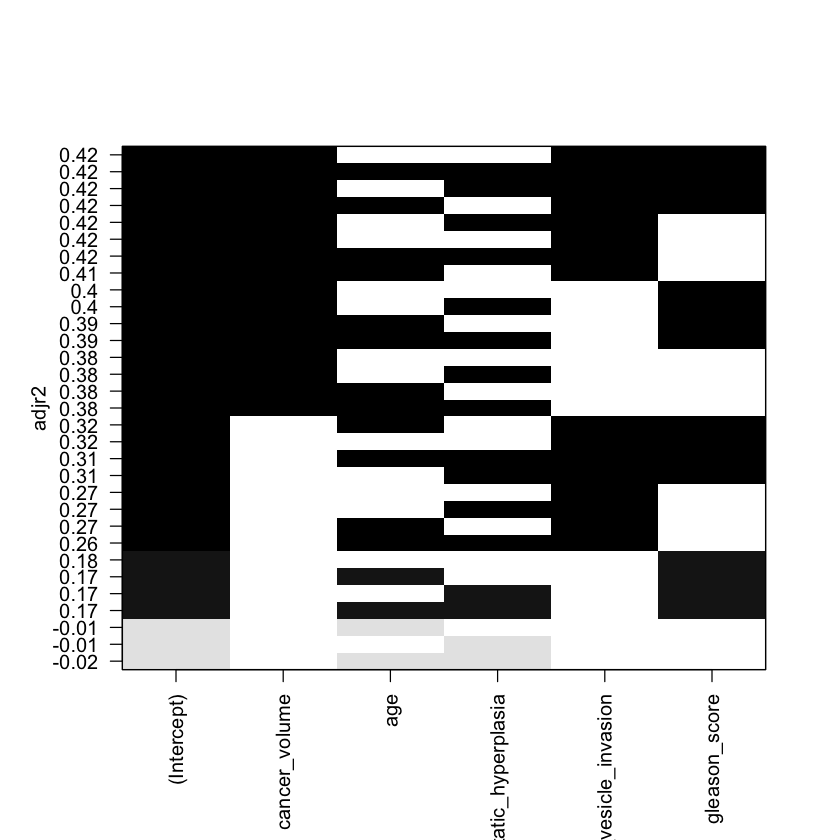

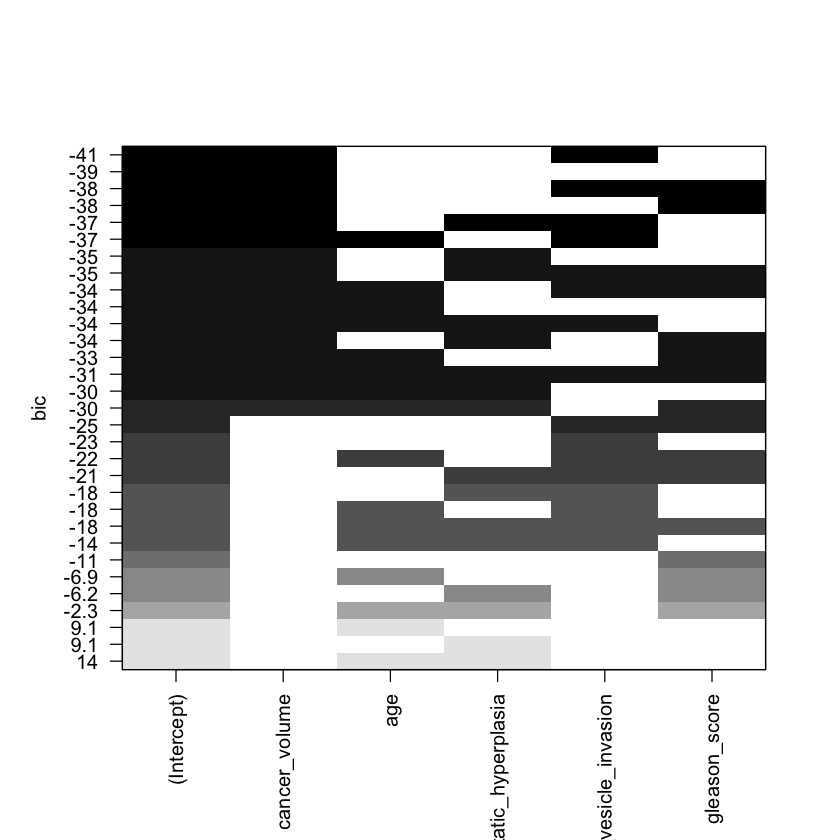

In [49]:
plot(leaps, scale="adjr2")
plot(leaps, scale="bic")